Kaggle: https://www.kaggle.com/c/titanic

Tutorial: https://www.kaggle.com/jiuzhang/aicamp-decision-tree-exercise-2-complete-version

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
TRAIN_DIR = './input/train.csv'
TEST_DIR = './input/test.csv'

# Explantory Data Analyisis

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def plot_hist_for_numeric_column_by_y(dataset, y_col, x_col):
    assert list(dataset[y_col].unique()) == [0, 1], "Input y_col should be 0 or 1.'"
        
    dataset[x_col].hist()  
    plt.ylabel(y_col) 
    plt.xlabel(x_col) 
    plt.title(f'{x_col} Distribution')
    plt.show() 

    dataset[dataset['Survived']==0][x_col].hist()  
    plt.ylabel(y_col) 
    plt.xlabel(x_col) 
    plt.title(f'{x_col} Distribution, {y_col}=0')
    plt.show()

    dataset[dataset['Survived']==1][x_col].hist()  
    plt.ylabel(y_col) 
    plt.xlabel(x_col) 
    plt.title(f'{x_col} Distribution, {y_col}=1')
    plt.show()

1.Take a Glance at the Data

In [5]:
train = pd.read_csv(TRAIN_DIR, sep=',', header=0)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

2.Look at Categorical Columns

<AxesSubplot:xlabel='Survived', ylabel='count'>

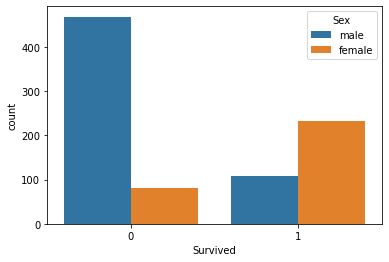

In [10]:
sns.countplot(data=train, x='Survived', hue='Sex')

Observation: Column "Sex" is useful. For people who survived, a large portion is female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

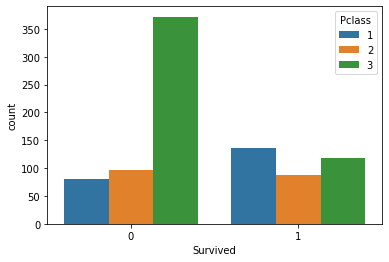

In [11]:
sns.countplot(data=train, x='Survived', hue='Pclass')

Observation: Column "Pclass" is useful. For people who didn't survive, a large portion is class 3.

<AxesSubplot:xlabel='Survived', ylabel='count'>

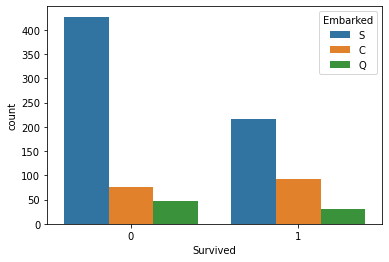

In [12]:
sns.countplot(data=train, x='Survived', hue='Embarked')

Observation: Column "Embarked" is useful. For people who didn't survive, a large portion is S.

3.Look at Numeric Columns

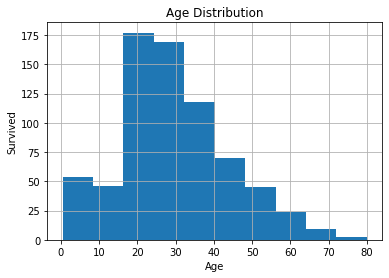

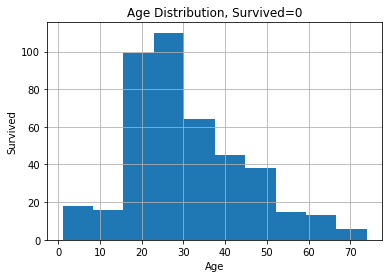

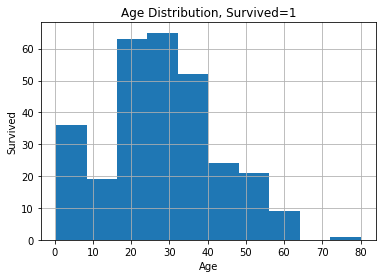

In [13]:
plot_hist_for_numeric_column_by_y(train, y_col='Survived', x_col='Age')

Observation: Column "Age" is useful. For people who survived, a large portion is kids.

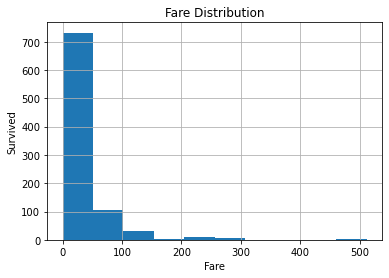

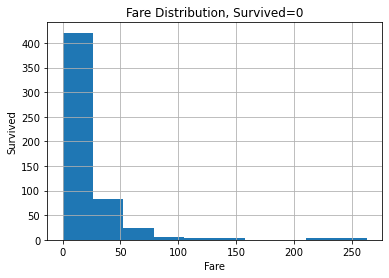

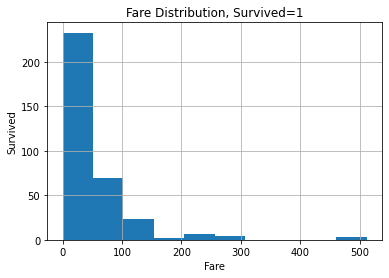

In [14]:
plot_hist_for_numeric_column_by_y(train, y_col='Survived', x_col='Fare')

Observation: Column "Fare" might not be useful.

# Prepare Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
def fill_nan(dataset):
    result = dataset.copy(deep=True)
    result.loc[:,'Age'] = result['Age'].fillna(result['Age'].median())
    result.loc[:,'Fare'] = result['Fare'].fillna(result['Fare'].median())
    result.loc[:,'Pclass'] = result['Pclass'].fillna(result['Pclass'].median())
    result.loc[:,'Sex'] = result['Sex'].fillna('female')
    result.loc[:,'Embarked'] = result['Embarked'].fillna('S')
    return result    

In [17]:
def label_categorical_column(dataset, col):
    assert col in dataset.columns, 'Column not found.'
    assert len(dataset[col].unique()) <= 4, \
        "Input x_col should be categorical column with unique values fewer than 5.'"
    
    num = 0
    for val in dataset[col].unique():
        dataset.loc[dataset[col] == val, col] = num
        num += 1

In [18]:
Y_COLUMN, X_COLUMNS, ID_COLUMN = ['Survived'], ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], ['PassengerId']

In [19]:
train = pd.read_csv(TRAIN_DIR, sep=',', header=0)
test = pd.read_csv(TEST_DIR, sep=',', header=0)

1. Keep Useful Columns

In [20]:
train = train[Y_COLUMN + X_COLUMNS]
test = test[ID_COLUMN + X_COLUMNS]

In [21]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


2. Fill NAN

In [22]:
train_non_nan = fill_nan(train)
test_non_nan = fill_nan(test)

In [23]:
train_non_nan.isnull().values.any()

False

In [24]:
test_non_nan.isnull().values.any()

False

3. Label Categorical Column

In [25]:
label_categorical_column(train_non_nan, col='Embarked')
label_categorical_column(test_non_nan, col='Embarked')
label_categorical_column(train_non_nan, col='Sex')
label_categorical_column(test_non_nan, col='Sex')

In [26]:
train_non_nan.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0


In [27]:
test_non_nan.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,0,34.5,7.8292,0
1,893,3,1,47.0,7.0000,1
2,894,2,0,62.0,9.6875,0
3,895,3,0,27.0,8.6625,1
4,896,3,1,22.0,12.2875,1


4. Training Set, Cross Validation Set, Test Set

In [28]:
X, y = train_non_nan.loc[:,X_COLUMNS], train_non_nan.loc[:,Y_COLUMN]

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0,test_size=0.2)
print(f'Training Set - X train shape: {X_train.shape}, y train shape: {y_train.shape}')
print(f'Validation Set - X val shape: {X_val.shape}, y train shape: {y_val.shape}')

Training Set - X train shape: (712, 5), y train shape: (712, 1)
Validation Set - X val shape: (179, 5), y train shape: (179, 1)


In [30]:
X_test = test_non_nan
print(f'Testset - X test shape: {X_test.shape}')

Testset - X test shape: (418, 6)


# Model: Decision Tree

In [31]:
from sklearn import tree
from sklearn.metrics import accuracy_score

1.Fit with Partial Training Set

In [32]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [33]:
pd.concat([pd.DataFrame(X_train.columns, columns=['Feature']),
           pd.DataFrame(dt.feature_importances_, columns=['Importance'])], 
          axis=1).sort_values(by='Importance', ascending=False)

,Feature,Importance
1,Sex,0.593016
0,Pclass,0.275728
2,Age,0.066131
3,Fare,0.065125
4,Embarked,0.000000


Observation: Column "Sex" and 'Pclass' are the most important.

2.Predict for Validation Set

In [34]:
y_pred = dt.predict(X_val[X_COLUMNS])
accuracy_score(y_pred, y_val)

0.8156424581005587

3.Fit with Whole Dataset

In [35]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

4.Predict for the Test Set

In [36]:
y_pred = dt.predict(X_test[X_COLUMNS])
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [37]:
pd.DataFrame({"PassengerId": X_test['PassengerId'], "Survived": y_pred})\
.to_csv('submission.csv',header=True, index=False)